最佳逼近多项式的系数: [ 4.83903228e-04  3.10311827e+00  4.62434601e-01 -7.13208187e+00
  3.56660571e+00]


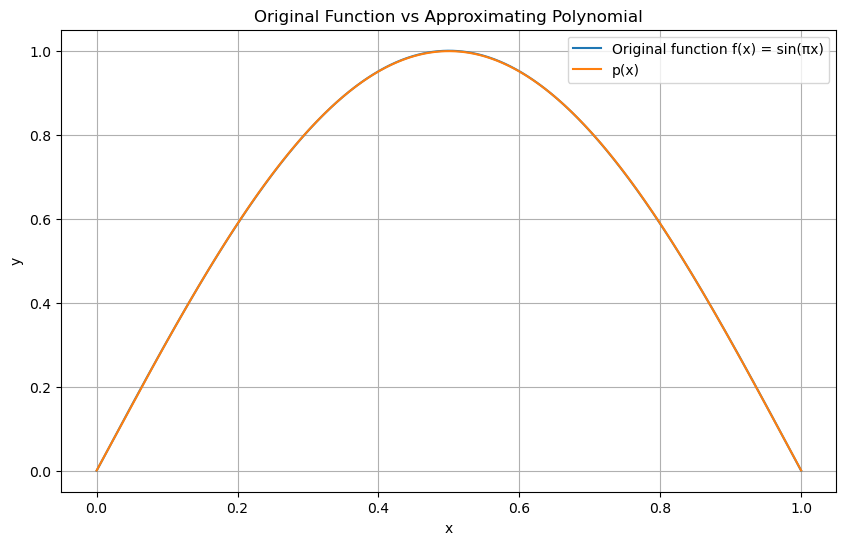

In [2]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

"""
[a, b]对f求n次最佳一致逼近多项式。
max_iter: 最大迭代次数

返回:
最佳逼近多项式的系数
"""
def remes(f, a, b, n, max_iter=1, epsilon=1e-5):
    # 初始猜测
    initial_guess = np.zeros(n + 2)
    initial_guess[-1] = 1e-5   #/mu
    x = np.linspace(a, b, n + 2)
    for _ in range(max_iter):
        x.sort()
        signs = (-1) ** np.arange(n + 2)
        
        def equations(vars):
            p_coeffs = vars[:-1]
            mu = vars[-1]
            A = np.vander(x, n + 1, increasing=True)
            residuals = f(x) - A @ p_coeffs - signs * mu
            return residuals


        result = fsolve(equations, initial_guess)
        p_coeffs = result[:-1]
        mu = result[-1]
        initial_guess = result.copy()

        p = np.poly1d(p_coeffs[::-1])

        # 寻找新的极值点
        num_points = 10000
        x_fine = np.linspace(a, b, num_points)
        errors = np.abs(f(x_fine) - p(x_fine))
        max_error_index = np.argmax(errors)
        new_point = x_fine[max_error_index]

        
        if np.abs(errors[max_error_index] - np.abs(mu)) < epsilon:
            break

        # 更新交错点
        if new_point not in x:
            def alternating_condition_violation(index):
                if index == 0:
                    return np.abs((f(x[index]) - p(x[index])) + (f(x[index + 1]) - p(x[index + 1])))
                elif index == n + 1:
                    return np.abs((f(x[index]) - p(x[index])) + (f(x[index - 1]) - p(x[index - 1])))
                else:
                    return np.abs((f(x[index]) - p(x[index])) + (f(x[index + 1]) - p(x[index + 1])) +
                                  (f(x[index]) - p(x[index])) + (f(x[index - 1]) - p(x[index - 1])))

            violations = [alternating_condition_violation(i) for i in range(n + 2)]
            replace_index = np.argmax(violations)
            x[replace_index] = new_point

    return p_coeffs



def f(x):
    return np.sin(np.pi*x)

a = 0
b = 1
n = 4
coefficients = remes(f, a, b, n,max_iter=100, epsilon=0.0005)
print("最佳逼近多项式的系数:", coefficients)


def p(x):
    p_n = np.poly1d(coefficients[::-1])
    return p_n(x)


# 绘制图像
x_vals = np.linspace(a, b, 1000)
y_f = f(x_vals)
y_p = p(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_f, label='Original function f(x) = sin(πx)')
plt.plot(x_vals, y_p, label='p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Function vs Approximating Polynomial')
plt.legend()
plt.grid(True)
plt.show()

最佳逼近多项式系数: [ 0.02880386 -1.36194599  9.74269221 -8.38074622]


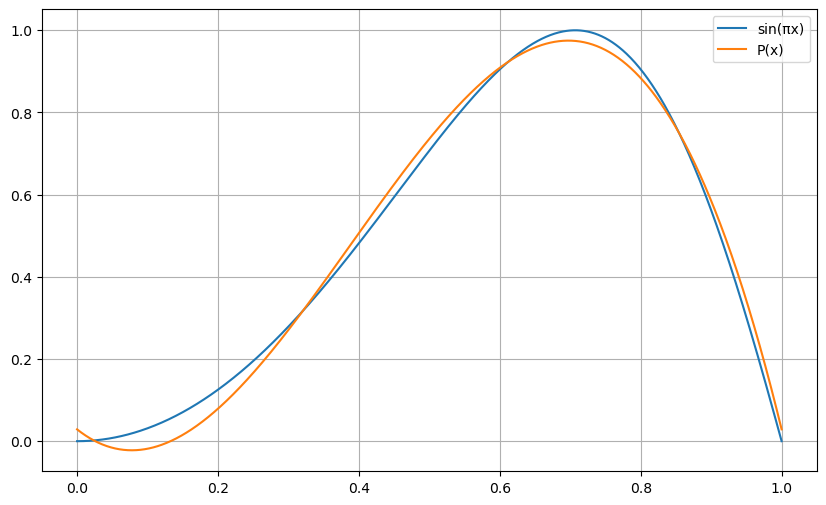

In [1]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

def remes(f, a, b, n, max_iter=10000, epsilon=1e-6):
    x = np.linspace(a, b, n + 2)
    vars_initial = np.zeros(n + 2)
    vars_initial[-1] = 1e-5  # 初始mu猜测

    for _ in range(max_iter):
        x.sort()  # 确保点有序
        A = np.vander(x, n + 1, increasing=True)
        signs = (-1) ** np.arange(n + 2)

        def equations(vars):
            p_coeffs = vars[:-1]
            mu = vars[-1]
            residuals = f(x) - A @ p_coeffs - signs * mu
            return residuals

        result = fsolve(equations, vars_initial)
        p_coeffs = result[:-1]
        mu = result[-1]
        vars_initial = result.copy()  # 更新"初始猜测"

        # 计算误差函数
        x_fine = np.linspace(a, b, 10000)
        p_values = np.polyval(p_coeffs[::-1], x_fine)
        error = f(x_fine) - p_values
        max_error_idx = np.argmax(np.abs(error))
        new_point = x_fine[max_error_idx]
        current_max_error = np.abs(error[max_error_idx])

        
        if np.abs(current_max_error - abs(mu)) < epsilon:
            break
        
        # 确定替换的旧点
        error_new = error[max_error_idx]
        sign_new = np.sign(error_new)
        old_errors = f(x) - np.polyval(p_coeffs[::-1], x)
        old_signs = np.sign(old_errors)

        # 找到符号相同的候选点
        candidates = np.where(old_signs == sign_new)[0]
        if len(candidates) == 0:
            candidates = np.arange(n + 2)

        # 选择距离最近的替换
        distances = np.abs(x[candidates] - new_point)
        replace_idx = candidates[np.argmin(distances)]
        x[replace_idx] = new_point

    return p_coeffs

def f(x):
    return np.sin(np.pi * x**2)


a, b, n = 0, 1, 3
coeffs = remes(f, a, b, n, max_iter=1)
print("最佳逼近多项式系数:", coeffs)

# 绘图
plt.figure(figsize=(10, 6))
x_vals = np.linspace(a, b, 1000)
plt.plot(x_vals, f(x_vals), label='sin(πx)')
plt.plot(x_vals, np.polyval(coeffs[::-1], x_vals), label='P(x)')
plt.grid(True)
plt.legend()
plt.show()